In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
autos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=-1)

autos.columns = ['symboling','normalized-losses','make','fuel-type','aspiration',
             'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
             'length','width','height','curb-weight','engine-type','num-of-cylinders',
             'engine-size','fuel-system','bore','stroke','compression-ratio',
             'horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
#columns = pd.read_table('imports-85.names.txt')
#columns

In [4]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
autos.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
autos.replace('?', np.nan, inplace=True)

autos['normalized-losses'] = pd.to_numeric(autos['normalized-losses'])


In [7]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nu

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


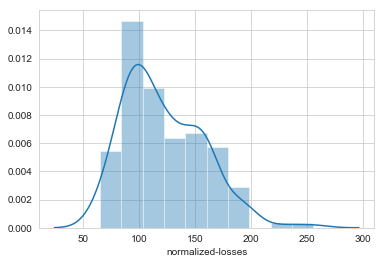

In [8]:
sns.distplot(autos['normalized-losses'].dropna())

In [9]:
normalized_losses_median = autos['normalized-losses'].dropna().median()
normalized_losses_median

115.0

In [10]:
autos['normalized-losses'].fillna(normalized_losses_median, inplace=True)
#autos['normalized-losses']

In [11]:
#autos.groupby(['make','fuel-type', ])

In [12]:
autos.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,203,205,205,205,205,205,205,201,201,203,203,201
unique,22,2,2,2,5,3,2,7,7,8,38,36,59,23,186
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,7957
freq,32,185,168,114,96,120,202,148,159,94,23,20,19,37,2


In [13]:
autos.bore = pd.to_numeric(autos.bore)
autos.stroke = pd.to_numeric(autos.stroke)
autos.horsepower = pd.to_numeric(autos.horsepower)
autos['peak-rpm'] = pd.to_numeric(autos['peak-rpm'])
autos.price = pd.to_numeric(autos.price)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


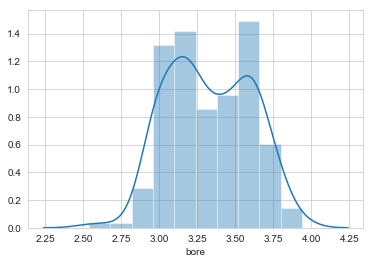

In [14]:
sns.distplot(autos.bore.dropna())

In [15]:
bore_mean = autos['bore'].dropna().mean()
bore_mean 
autos['bore'].fillna(bore_mean, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


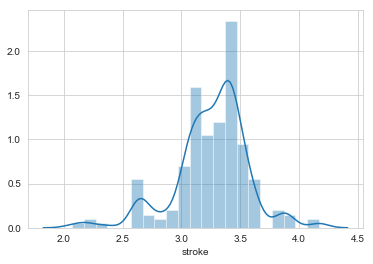

In [16]:
sns.distplot(autos.stroke.dropna())

In [17]:
autos.skew()

symboling            0.211072
normalized-losses    0.976114
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
bore                 0.020211
stroke              -0.683122
compression-ratio    2.610862
horsepower           1.391029
peak-rpm             0.073237
city-mpg             0.663704
highway-mpg          0.539997
price                1.809675
dtype: float64

In [18]:
stroke_median = autos['stroke'].dropna().median()
stroke_median 
autos['stroke'].fillna(stroke_median, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


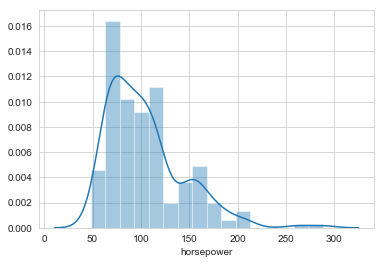

In [19]:
sns.distplot(autos.horsepower.dropna())

In [20]:
horsepower_median = autos['horsepower'].dropna().median()
horsepower_median 
autos['horsepower'].fillna(horsepower_median, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


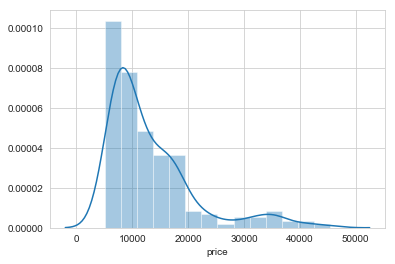

In [21]:
sns.distplot(autos.price.dropna())

In [22]:
price_median = autos['price'].dropna().median()
price_median 
autos['price'].fillna(price_median, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


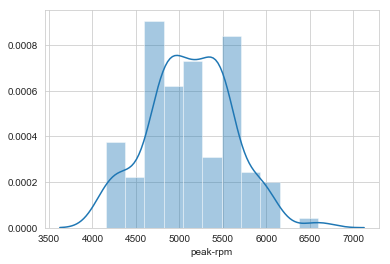

In [23]:
sns.distplot(autos['peak-rpm'].dropna())

In [24]:
autos.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [25]:
peak_rpm_median = autos['peak-rpm'].dropna().median()
peak_rpm_median 
autos['peak-rpm'].fillna(peak_rpm_median, inplace=True)

In [26]:
autos.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [27]:
autos.symboling = autos.symboling.astype(str)
#pd.get_dummies(autos[['symboling']])

In [28]:
df2 = pd.get_dummies(autos[['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']], drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 55 columns):
symboling_-2               205 non-null uint8
symboling_0                205 non-null uint8
symboling_1                205 non-null uint8
symboling_2                205 non-null uint8
symboling_3                205 non-null uint8
make_audi                  205 non-null uint8
make_bmw                   205 non-null uint8
make_chevrolet             205 non-null uint8
make_dodge                 205 non-null uint8
make_honda                 205 non-null uint8
make_isuzu                 205 non-null uint8
make_jaguar                205 non-null uint8
make_mazda                 205 non-null uint8
make_mercedes-benz         205 non-null uint8
make_mercury               205 non-null uint8
make_mitsubishi            205 non-null uint8
make_nissan                205 non-null uint8
make_peugot                205 non-null uint8
make_plymouth              205 non-null uint8
make_porsche         

In [29]:
autos_dummy = pd.concat([autos, df2], axis=1)

In [30]:
autos_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 81 columns):
symboling                  205 non-null object
normalized-losses          205 non-null float64
make                       205 non-null object
fuel-type                  205 non-null object
aspiration                 205 non-null object
num-of-doors               203 non-null object
body-style                 205 non-null object
drive-wheels               205 non-null object
engine-location            205 non-null object
wheel-base                 205 non-null float64
length                     205 non-null float64
width                      205 non-null float64
height                     205 non-null float64
curb-weight                205 non-null int64
engine-type                205 non-null object
num-of-cylinders           205 non-null object
engine-size                205 non-null int64
fuel-system                205 non-null object
bore                       205 non-null float6

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
autos_dummy.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'symboling_-2', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_gas', 'aspiration_turbo', 'num-of-doors_two',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon',

In [34]:
X= autos_dummy[ ['aspiration_turbo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'bore',
       'city-mpg', 'compression-ratio', 'curb-weight',
       'drive-wheels_fwd', 'drive-wheels_rwd', 
       'engine-location_rear', 'engine-size', 
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
        'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi', 'fuel-type_gas',
       'height', 'highway-mpg', 'horsepower', 'length', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'normalized-losses',
        'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'num-of-cylinders_two',
       'num-of-doors_two', 'peak-rpm', 'stroke', 
       'symboling_-2', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'wheel-base', 'width']]


In [59]:
y= np.array(autos_dummy['price'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [79]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 30 to 87
Data columns (total 69 columns):
aspiration_turbo           69 non-null uint8
body-style_hardtop         69 non-null uint8
body-style_hatchback       69 non-null uint8
body-style_sedan           69 non-null uint8
body-style_wagon           69 non-null uint8
bore                       69 non-null float64
city-mpg                   69 non-null int64
compression-ratio          69 non-null float64
curb-weight                69 non-null int64
drive-wheels_fwd           69 non-null uint8
drive-wheels_rwd           69 non-null uint8
engine-location_rear       69 non-null uint8
engine-size                69 non-null int64
engine-type_dohcv          69 non-null uint8
engine-type_l              69 non-null uint8
engine-type_ohc            69 non-null uint8
engine-type_ohcf           69 non-null uint8
engine-type_ohcv           69 non-null uint8
engine-type_rotor          69 non-null uint8
fuel-system_2bbl           69 non-nul

In [80]:
y_test

array([ 6479., 12964., 31600.,  8845.,  7788.,  9639., 16430.,  7053.,
        5572.,  6849., 13200., 16503., 18620., 10945., 10595., 16500.,
       11048., 19699.,  9549., 13495.,  6692., 16558.,  8845., 15580.,
       16925., 10698.,  8013., 18150., 10245., 12440., 19045., 18920.,
       16900.,  6229.,  5572., 40960.,  8948.,  8921., 11199., 13499.,
        8495., 15750.,  5118., 18150.,  7126., 17075.,  7999., 10295.,
        6377., 10295.,  9538.,  9960.,  9495.,  9989., 12170.,  9959.,
       15690., 16515.,  9258.,  8499.,  7898.,  7499.,  7609.,  6095.,
       10345., 15250.,  6575.,  9988.,  9279.])

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
lm.score(X_train, y_train)

0.9697007117734112

In [66]:
lm.score(X_test, y_test)

0.7904111717250768

In [81]:
y_pred = lm.predict(X_test)

In [82]:
y_pred

array([ 1371.22560335,  9699.9763117 , 30282.71259321, 12763.77238021,
        6895.23415824, 12401.05285372, 22606.09655114,  6935.69812267,
        4025.64050932,  6829.58393587, 17402.235396  , 24997.80639533,
       13932.4543583 , 12729.69320854, 12763.77238021, 15642.73597012,
        8018.55106347, 18145.03735547, 11144.82075029, 15642.73597012,
        7182.14697361, 15873.61761979,  8316.769654  , 15715.2684344 ,
       21963.37313325, 13379.45507749,  8757.71747762, 11325.28530592,
       13137.35923778, 12650.29527862, 21311.57669784, 19161.00961943,
       17738.98480818,  5812.22204187,  4455.86880094, 43919.00896608,
        9132.16289476,  8354.63709533, 13276.60132538, 14411.87655263,
       13137.35923778, 14819.27445606,  7155.04036065, 19417.16739999,
        9162.17647428, 17288.73661931,  6099.02336844,  5583.94227864,
        4350.53821349,  9603.05882504,  7852.05924698, 10492.91467862,
        9083.16169504, 11283.04445387, 13990.01079022,  8755.87564358,
      

In [68]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
aspiration_turbo,1.811747e+03
body-style_hardtop,-2.455735e+03
body-style_hatchback,-3.665584e+03
body-style_sedan,-2.197719e+03
body-style_wagon,-2.557671e+03
bore,-2.758349e+03
city-mpg,-7.184411e+01
compression-ratio,-9.977190e+02
curb-weight,6.122717e+00
drive-wheels_fwd,1.320654e+03


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


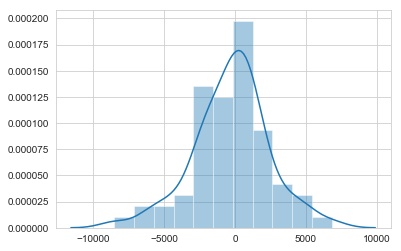

In [69]:
sns.distplot(y_test - y_pred)

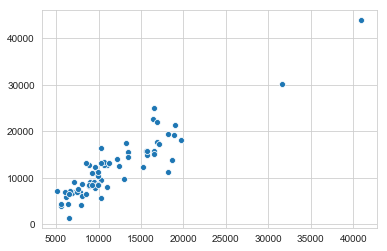

In [87]:
sns.scatterplot(y_test, y_pred)

In [89]:
from sklearn import metrics

In [90]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('MSLE: ', metrics.mean_squared_log_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1975.1522628661878
MSE:  7191726.027455762
MSLE:  0.08514972961029024
RMSE:  2681.739366056247


### Stats model

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()